In [ ]:
library(tidyverse)
library(NMF)
library(Seurat)
library(RColorBrewer)
library(corrplot)
library(org.Hs.eg.db)
library(clusterProfiler)
library(AUCell)

setwd("/media/inspur/AS2150G2/LDK/sclc_metastasis/")
getwd()

In [14]:
readRDS("/media/inspur/AS2150G2/LDK/sclc_metastasis/rds_from_Mr.wang/NSCLC_celltype.rds")-> subset_NSCLC
load("/media/inspur/AS2150G2/LDK/sclc_metastasis/data_out/2.SCLC.filter.rdata")
subset_SCLC <- SCLC.filter; rm(SCLC.filter);ls()

[1] "NSCLC_tumor"  "SCLC_tumor"   "subset_NSCLC" "subset_SCLC"  "tumorcell"

In [15]:
subset(subset_NSCLC, new_celltype =="Epithelial")->NSCLC_tumor
subset(subset_SCLC, celltype =="tumor")->SCLC_tumor

In [16]:
tumorcell <- merge(NSCLC_tumor, y = SCLC_tumor, project = "tumor")

In [12]:
# saveRDS(tumorcell, file = "data_out/3.2.tumorcell.rds")
# readRDS("data_out/3.2.tumorcell.rds")->tumorcell

In [140]:
# check
tumorcell
head(tumorcell@meta.data)
table(tumorcell$orig.ident)

An object of class Seurat 
39839 features across 15024 samples within 1 assay 
Active assay: RNA (39839 features, 0 variable features)

,orig.ident,nCount_RNA,nFeature_RNA,UMAP_1,UMAP_2,Celltype..malignancy.,Celltype..major.lineage.,Celltype..minor.lineage.,seurat_clusters,Sample,⋯,Source,Stage,celltype,percent.mt,RNA_snn_res.0.5,RNA_snn_res.2,new_celltype,sample,percent.HB,RNA_snn_res.0.8
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>
ACTTACTAGAACAACT_LN_11,LN_11,8660,1808,-5.955090,4.8156635,Immune cells,B,B,29,LN_11,⋯,Pleural effusion,Primary,B,0.5773672,16,29,Epithelial,NA,NA,NA
AAGGTTCAGCGAGAAA_LN_11,LN_11,3544,1036,-6.195390,5.1381489,Immune cells,CD4Tconv,CD4Tn,18,LN_11,⋯,Pleural effusion,Primary,CD4Tconv,0.3103837,6,18,Epithelial,NA,NA,NA
ATCATGGTCTAACGGT_EBUS_19,EBUS_19,6750,2185,-4.173180,0.9200947,Immune cells,CD4Tconv,CD4Tn,31,EBUS_19,⋯,mLN,Metastatic,CD4Tconv,2.6370370,17,31,Epithelial,NA,NA,NA
CAGCCGAGTCATCGGC_LN_11,LN_11,3935,1566,-5.665856,4.9351789,Immune cells,CD4Tconv,CD4Tn,18,LN_11,⋯,Pleural effusion,Primary,CD4Tconv,0.2795426,6,18,Epithelial,NA,NA,NA
CCACGGAAGTTATCGC_LN_07,LN_07,5258,1821,-5.763158,3.1899425,Immune cells,CD4Tconv,CD4Tn,18,LN_07,⋯,Pleural effusion,Primary,CD4Tconv,5.8577406,6,18,Epithelial,NA,NA,NA
CTGAAACTCTCAAGTG_LN_04,LN_04,3439,1248,-5.697272,3.6802415,Immune cells,CD4Tconv,CD4Tn,18,LN_04,⋯,nLN,Primary,CD4Tconv,2.5588834,6,18,Epithelial,NA,NA,NA



BRONCHO_11    EBUS_10    EBUS_12    EBUS_13    EBUS_15    EBUS_19    EBUS_51 
       200        406        295        359        215        227       1299 
     LN_01      LN_02      LN_03      LN_04      LN_05      LN_06      LN_07 
         7          6          3          6         16          6         29 
     LN_08      LN_11      LN_12         S1         S2         S3         S4 
        15         13         19       1587       2601         38       2330 
        S5         S6         S7 
        74       4896        377 

In [19]:
topn <- 3000
ranks <- 4
library(NMF)

In [20]:
patients=c("EBUS_10","BRONCHO_11","EBUS_12","EBUS_13","EBUS_15","EBUS_19","EBUS_51","S1","S2","S3","S4","S5","S6","S7")

In [29]:
getwd()
ls()
patients

[1] "/media/inspur/AS2150G2/LDK/sclc_metastasis"

[1] "genesd"       "i"            "nmfdat"       "NSCLC_tumor"  "patients"    
 [6] "ranks"        "res_4"        "SCLC_tumor"   "signature"    "subset_NSCLC"
[11] "subset_SCLC"  "topn"         "topNgene"     "tumorcell"

[1] "EBUS_10"    "BRONCHO_11" "EBUS_12"    "EBUS_13"    "EBUS_15"   
 [6] "EBUS_19"    "EBUS_51"    "S1"         "S2"         "S3"        
[11] "S4"         "S5"         "S6"         "S7"

In [ ]:
for (i in patients){
  if (!dir.exists("nmfSingle")){
    dir.create("./nmfSingle")
  }
   if (!dir.exists(paste0("nmfSingle/", i))){
    dir.create(paste0("nmfSingle/", i))
  }
  #nmfdat <- epidat[, str_detect(colnames(epidat), i)]
   nmfdat<-as.matrix(subset(tumorcell,orig.ident== i)$RNA@data)
  ## Step 02: chose top 6000 genes with highest sds
  nmfdat[nmfdat < 0] <- 0 # Gene expression values less than zero are replaced by 0
  genesd <- apply(nmfdat, 1, sd)
  topNgene <- genesd[order(genesd, decreasing = T)][1:topn]
  nmfdat <- nmfdat[rownames(nmfdat) %in% names(topNgene), ]
  # nrun可以选择在30-50之间
  print(system.time(res_4 <- nmf(nmfdat, rank = ranks, method="brunet", nrun=30, seed=123456))) 
  signature <- NMF::basis(res_4)
  # consensusdat <- res_4@consensus 
  # 看聚类的轮廓值
  # si <- silhouette(res_4, what = 'consensus')
  # sicluster <- si[1:ncol(nmfdat), ]
  # 保存NMF的一些聚类图
  # tiff(paste0("./nmfSingle/", i, "/consensus_", topn, ".tiff"), 
   #     width = 6*480, height = 4*480, res = 300)
   #consensusmap(res_4)
   #dev.off()
   #tiff(paste0("./nmfSingle/", i, "/basicmap_", topn, ".tiff"), 
   #     width = 8 * 480, height = 4*480, res = 300)
   #basismap(res_4)
   #dev.off()
   #tiff(paste0("./nmfSingle/", i, "/coefmap_", topn, ".tiff"), 
   #     width = 8 * 480, height = 4*480, res = 300)
   #coefmap(res_4)
   #dev.off()
  colnames(signature) <- paste0(i, "_", 1:ranks)
  signature <- as.data.frame(signature)
  # save data
  write.table(signature, paste0("./nmfSingle/", i, "/singature", topn, ".txt"),
              sep = "\t")
   saveRDS(res_4, file = paste0("./nmfSingle/", i, "/res", ranks, "_", topn, ".rds"))
  print(paste0("NMF for the", i, "is Done!"))
}


## Try1

In [7]:
library(tidyverse)

gene_list=c()
merge_list=list()
meta_list=c()
for (i in 1:length(patients)){
  filedir <- paste0("./nmfSingle/", patients[i], "/singature", topn, ".txt")
  geneloading <- read.table(filedir, header = T, sep = "\t")
  merge_list[[i]]<-geneloading
  gene_list=c(gene_list,rownames(geneloading))
  meta_list=c(meta_list,colnames(geneloading))
  }

In [8]:
head(gene_list); length(gene_list);length(unique(gene_list))
head(meta_list); length(meta_list)

[1] "AAED1" "AAMDC" "AAMP"  "ABCC3" "ABCE1" "ABCF1"

[1] 42000

[1] 7720

[1] "EBUS_10_1"    "EBUS_10_2"    "EBUS_10_3"    "EBUS_10_4"    "BRONCHO_11_1"
[6] "BRONCHO_11_2"

[1] 56

In [9]:
str(merge_list)

List of 14
 $ :'data.frame':	3000 obs. of  4 variables:
  ..$ EBUS_10_1: num [1:3000] 7.34e-01 1.49 1.39 2.22e-16 6.01e-01 ...
  ..$ EBUS_10_2: num [1:3000] 4.61 2.61 4.67 1.88 4.06 ...
  ..$ EBUS_10_3: num [1:3000] 1.5463 3.0148 4.2134 0.0671 0.4974 ...
  ..$ EBUS_10_4: num [1:3000] 2.22e-16 2.22e-16 1.42 7.37 1.81 ...
 $ :'data.frame':	3000 obs. of  4 variables:
  ..$ BRONCHO_11_1: num [1:3000] 7.94e-01 2.22e-16 1.44 2.22e-16 2.22e-16 ...
  ..$ BRONCHO_11_2: num [1:3000] 0.465 0.708 0.886 1.045 0.629 ...
  ..$ BRONCHO_11_3: num [1:3000] 2.248 0.783 0.835 1.487 1.015 ...
  ..$ BRONCHO_11_4: num [1:3000] 2.83 4.43 4.39 6.23 4.25 ...
 $ :'data.frame':	3000 obs. of  4 variables:
  ..$ EBUS_12_1: num [1:3000] 2.22e-16 2.22e-16 6.22 2.97 5.27 ...
  ..$ EBUS_12_2: num [1:3000] 2.14 1.38 0.508 0.851 0.373 ...
  ..$ EBUS_12_3: num [1:3000] 0.0784 2.1327 2.5441 2.3877 3.8696 ...
  ..$ EBUS_12_4: num [1:3000] 2.12e-01 3.92 2.22e-16 1.52 2.22e-16 ...
 $ :'data.frame':	3000 obs. of  4 variables:


In [10]:
unique(gene_list)->gene_list2

matrix(0,length(gene_list2),length(meta_list))-> M_tmp
colnames(M_tmp)<-meta_list
rownames(M_tmp)<-gene_list2

In [11]:
M_tmp

,EBUS_10_1,EBUS_10_2,EBUS_10_3,EBUS_10_4,BRONCHO_11_1,BRONCHO_11_2,BRONCHO_11_3,BRONCHO_11_4,EBUS_12_1,EBUS_12_2,⋯,S5_3,S5_4,S6_1,S6_2,S6_3,S6_4,S7_1,S7_2,S7_3,S7_4
AAED1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAMDC,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
AAMP,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABCC3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABCE1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABCF1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABHD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABHD11-AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABHD14B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ABI2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [12]:
for (i in 1:length(merge_list)){
geneloading<-as.matrix(merge_list[[i]])
M_tmp[ rownames(geneloading),colnames(geneloading)]<-geneloading

  }

In [13]:
M_tmp

,EBUS_10_1,EBUS_10_2,EBUS_10_3,EBUS_10_4,BRONCHO_11_1,BRONCHO_11_2,BRONCHO_11_3,BRONCHO_11_4,EBUS_12_1,EBUS_12_2,⋯,S5_3,S5_4,S6_1,S6_2,S6_3,S6_4,S7_1,S7_2,S7_3,S7_4
AAED1,7.339783e-01,4.606327e+00,1.546282e+00,2.220446e-16,0.000000e+00,0.0000000,0.000000e+00,0.000000,0.000000e+00,0.00000000,⋯,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
AAMDC,1.492285e+00,2.608171e+00,3.014766e+00,2.220446e-16,1.440888e+00,0.8860674,8.347579e-01,4.391664,2.220446e-16,1.37970556,⋯,0.000000e+00,0.000000e+00,1.229022,1.348510e-05,6.612420,2.388196,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
AAMP,1.386188e+00,4.667683e+00,4.213414e+00,1.420516e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000,0.000000e+00,0.00000000,⋯,0.000000e+00,0.000000e+00,1.567524,1.506574e+00,3.019342,1.337657,1.510157e+00,1.202885e+00,1.534895,4.967792e+00
ABCC3,2.220446e-16,1.878950e+00,6.707795e-02,7.368991e+00,2.220446e-16,1.0449622,1.486866e+00,6.226681,6.219859e+00,0.50770436,⋯,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
ABCE1,6.007611e-01,4.064098e+00,4.974158e-01,1.807560e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000,0.000000e+00,0.00000000,⋯,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.387698e+00,2.825842e+00,2.428195,2.978213e+00
ABCF1,5.919799e-01,3.363336e+00,1.385398e+00,3.289564e+00,2.220446e-16,0.6292176,1.015103e+00,4.252920,2.972818e+00,0.85094634,⋯,2.976294e+00,2.220446e-16,1.999225,5.805024e+00,2.688312,2.478640,2.498994e+00,1.729724e+00,3.140832,3.612779e+00
ABHD11,1.061699e+00,3.267222e+00,9.069694e-01,1.908692e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000,5.266658e+00,0.37281817,⋯,2.220446e-16,2.220446e-16,0.000000,0.000000e+00,0.000000,0.000000,2.220446e-16,2.185722e+00,2.303143,2.378721e+00
ABHD11-AS1,1.007070e+00,2.220446e-16,2.005243e+00,5.673126e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000,0.000000e+00,0.00000000,⋯,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
ABHD14B,8.513836e-01,6.294992e+00,2.677681e+00,2.220446e-16,0.000000e+00,0.0000000,0.000000e+00,0.000000,0.000000e+00,0.00000000,⋯,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
ABI2,1.618231e+00,2.220995e+00,4.271379e-01,6.131393e+00,0.000000e+00,0.0000000,0.000000e+00,0.000000,0.000000e+00,0.00000000,⋯,3.325150e+00,3.800918e+00,1.278839,8.836548e+00,1.604843,4.337325,1.221410e+00,3.076318e+00,5.815275,3.247591e-01


In [14]:
apply(M_tmp,1,sd)->M_sd
names(sort(M_sd,decreasing=T))->sd_gene
M_tmp[sd_gene,]-> M_tmp2
clusterK = 5
M <- cor(M_tmp2, method = "pearson")
cor_method="ward.D2"

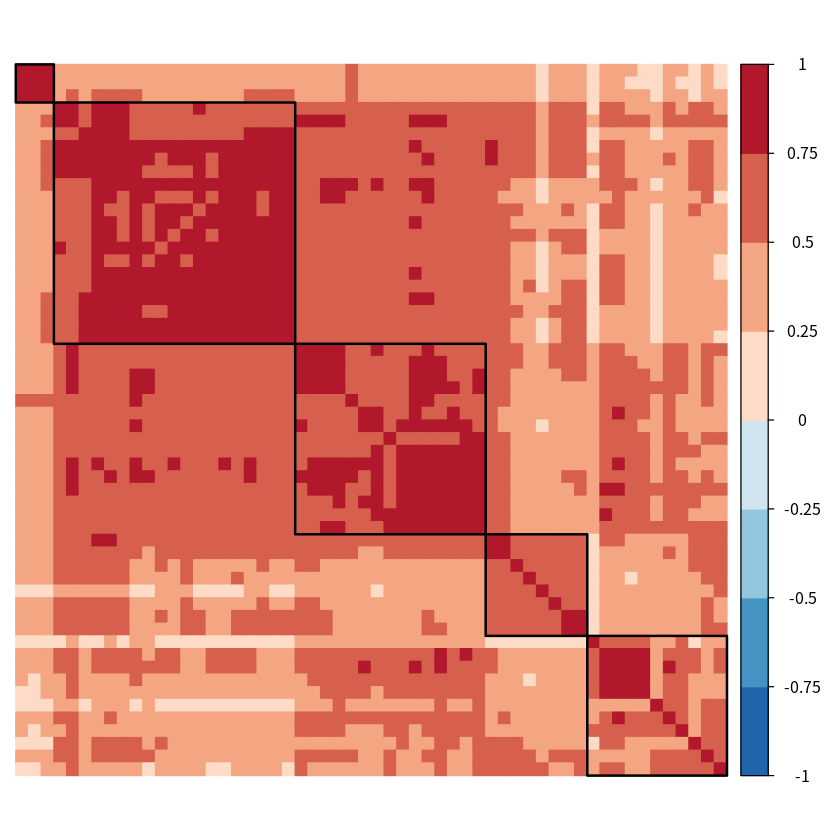

In [15]:
#用corrplot画图，便于标出各cluster的黑色方框
#pdf("scNMF.pdf")
library(RColorBrewer)
library(corrplot)

corrplot(M, 
         method = "color", #用颜色展示相关系数，还可以改为"circle" (default), "square", "ellipse", "number", "pie", "shade"
         order = "hclust", 
         hclust.method = cor_method, 
         addrect = clusterK, #画黑色方框
         tl.pos = "n", #"n" means don't add textlabel
         col = rev(brewer.pal(n = 8, name = "RdBu"))) # 运行?brewer.pal查看更多配色方案

In [16]:
cororder <- corrMatOrder(M, order = "hclust", hclust.method = cor_method) #ward.D2
M.hc <- M[cororder, cororder]
tree <- hclust(as.dist(1 - M.hc), method = cor_method)
clus <- cutree(tree, clusterK)
table(clus)

clus
 1  2  3  4  5 
 3 19 15  8 11 

In [17]:
list_scores=list()
for(k in 1: clusterK)
{
names(which(clus==k))->select_meta
M_tmp[, select_meta]->M_select
apply(M_select,2,function(x) rownames(M_tmp)[order(x,decreasing=T)[1:100]])->select_genes
unique(as.vector(select_genes))-> select_genes2
new_matrix=matrix(0,length(select_genes2),length(select_meta))
colnames(new_matrix)<-select_meta
rownames(new_matrix)<-select_genes2

 for(kk in 1:length(select_meta))
{
   new_matrix[select_genes[,kk],select_meta[kk]]<-M_select[select_genes[,kk],select_meta[kk]]
}
rowMeans(new_matrix)->average_scores
list_scores[[k]]<-average_scores
}

In [18]:
library(org.Hs.eg.db)
library(clusterProfiler)

In [19]:
k=2
names(which(clus==k))
cand_gene<-names(sort(list_scores[[k]],decreasing=T))[1:150]

go <- enrichGO(cand_gene ,OrgDb = org.Hs.eg.db, ont='BP',pAdjustMethod = 'fdr',pvalueCutoff = 0.05,       qvalueCutoff = 0.2 , keyType = 'SYMBOL')

[1] "EBUS_10_1"    "S1_2"         "EBUS_15_2"    "EBUS_12_3"    "BRONCHO_11_2"
 [6] "EBUS_12_2"    "EBUS_13_1"    "EBUS_13_3"    "EBUS_10_2"    "EBUS_15_3"   
[11] "EBUS_51_3"    "EBUS_19_1"    "EBUS_19_2"    "EBUS_12_4"    "EBUS_51_2"   
[16] "BRONCHO_11_1" "BRONCHO_11_3" "EBUS_10_3"    "EBUS_15_4"

In [20]:
head(go)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0002181,GO:0002181,cytoplasmic translation,77/137,148/18722,1.243089e-133,2.213942e-130,1.926134e-130,RPL10/RPS18/RPL41/RPLP1/RPL13A/RPS27/RPS19/RPL13/RPS12/RPL19/RPL11/RPS23/RPL27A/RPL23A/RPS3A/RPL28/RPL34/RPS14/RPL32/RPL21/RPS15A/RPL18A/RPS8/RPL30/RPS3/RPL12/RPL39/RPS16/RPS27A/RPL37/RPLP2/RPS4X/RPS25/RPL35A/RPL7/RPL26/RPS2/RPL8/RPS24/RPL29/RPS7/RPL36/RPS5/RPS13/RPS15/RPS6/RPL31/RPS20/RPL9/RPL3/RPL37A/RPL15/RPS9/RPL35/RPS17/RPL18/RPL27/RPS29/RPL14/RPS11/RPL10A/RPL24/RPL22/RPL7A/RPL6/RPS28/RPLP0/RPL23/RPL38/RPS21/RPS10/RPL5/UBA52/RPS26/RPL36A/RPSA/RPL4,77
GO:0042254,GO:0042254,ribosome biogenesis,33/137,299/18722,1.107855e-29,9.865447e-27,8.582959e-27,RPL10/RPS27/RPS19/RPL11/RPL23A/RPS14/RPS8/RPS16/RPS25/RPL35A/RPL7/RPL26/RPS24/RPS7/RPS5/RPS15/RPS6/RPL3/RPL35/RPS17/RPL27/RPL14/RPL10A/RPL24/RPL7A/RPL6/RPS28/RPLP0/RPL38/RPS21/RPL5/RPSA/NPM1,33
GO:0022613,GO:0022613,ribonucleoprotein complex biogenesis,34/137,463/18722,1.166953e-24,6.927811e-22,6.027210e-22,RPL10/RPL13A/RPS27/RPS19/RPL11/RPL23A/RPS14/RPS8/RPS16/RPS25/RPL35A/RPL7/RPL26/RPS24/RPS7/RPS5/RPS15/RPS6/RPL3/RPL35/RPS17/RPL27/RPL14/RPL10A/RPL24/RPL7A/RPL6/RPS28/RPLP0/RPL38/RPS21/RPL5/RPSA/NPM1,34
GO:0042255,GO:0042255,ribosome assembly,17/137,61/18722,7.269197e-23,3.236610e-20,2.815857e-20,RPL10/RPS27/RPS19/RPL11/RPL23A/RPS14/RPS5/RPS15/RPL3/RPL24/RPL6/RPS28/RPLP0/RPL38/RPL5/RPSA/NPM1,17
GO:0042273,GO:0042273,ribosomal large subunit biogenesis,17/137,72/18722,1.717189e-21,6.116627e-19,5.321478e-19,RPL10/RPL11/RPL23A/RPL35A/RPL7/RPL26/RPL3/RPL35/RPL14/RPL10A/RPL24/RPL7A/RPL6/RPLP0/RPL38/RPL5/NPM1,17
GO:0042274,GO:0042274,ribosomal small subunit biogenesis,17/137,73/18722,2.224892e-21,6.604221e-19,5.745686e-19,RPS27/RPS19/RPS14/RPS8/RPS16/RPS25/RPS24/RPS7/RPS5/RPS15/RPS6/RPS17/RPS28/RPL38/RPS21/RPSA/NPM1,17


## try2

In [21]:
####### try2
patients=c("EBUS_10","BRONCHO_11","EBUS_12","EBUS_13","EBUS_15","EBUS_19","EBUS_51","S1","S2","S3","S4","S5","S6","S7")
patients2<-paste0("P", patients)

In [22]:
library(tidyverse)
topn=3000
topRank <- 100
programG <- list()

In [23]:
for (i in 1:length(patients)){
  filedir <- paste0("./nmfSingle/", patients[i], "/singature", topn, ".txt")
  geneloading <- read.table(filedir, header = T, sep = "\t")
colnames(geneloading)<-paste0("P", colnames(geneloading))
  geneloading$maxC <- apply(geneloading, 1, which.max) %>% 
    paste0(patients2[i], "_", .)
  
  topgenelist <- rownames_to_column(geneloading, var = "gene") %>%
      pivot_longer(., cols = starts_with("P"), 
                  names_to = "program", values_to = "loading")
  
  topgenelist <- dplyr::filter(topgenelist, maxC == program) %>% 
      group_by(maxC) %>% top_n(n = topRank, wt = loading)
  topgenelist <- split(topgenelist$gene, topgenelist$maxC)
  programG <- c(programG, topgenelist)
}

In [24]:
unique(unlist(programG))-> programG_gene

In [25]:
library(tidyverse)

gene_list=c()
merge_list=list()
meta_list=c()

In [26]:
for (i in 1:length(patients)){
  filedir <- paste0("./nmfSingle/", patients[i], "/singature", topn, ".txt")
  geneloading <- read.table(filedir, header = T, sep = "\t")
  merge_list[[i]]<-geneloading
  gene_list=c(gene_list,rownames(geneloading))
  meta_list=c(meta_list,colnames(geneloading))
  }

In [27]:
unique(gene_list)->gene_list2

In [28]:
matrix(0,length(gene_list2),length(meta_list))-> M_tmp
colnames(M_tmp)<-meta_list
rownames(M_tmp)<-gene_list2

In [29]:
for (i in 1:length(merge_list)){
geneloading<-as.matrix(merge_list[[i]])
M_tmp[ rownames(geneloading),colnames(geneloading)]<-geneloading

  }

In [30]:
matrix(0,length(programG_gene),length(meta_list))-> M_prog
colnames(M_prog)<-meta_list
rownames(M_prog)<-programG_gene

In [31]:
for (i in 1:length(meta_list)){
M_prog[ programG[[i]], i]<-M_tmp[ programG[[i]], i]

  }

In [32]:
clusterK = 6
M <- cor(M_prog, method = "pearson")

cor_method="average"
library(corrplot)
library(RColorBrewer)

Warning message in ind1:ind2:
“numerical expression has 100 elements: only the first used”
Warning message in title(title, ...):
“"cl.lim" is not a graphical parameter”


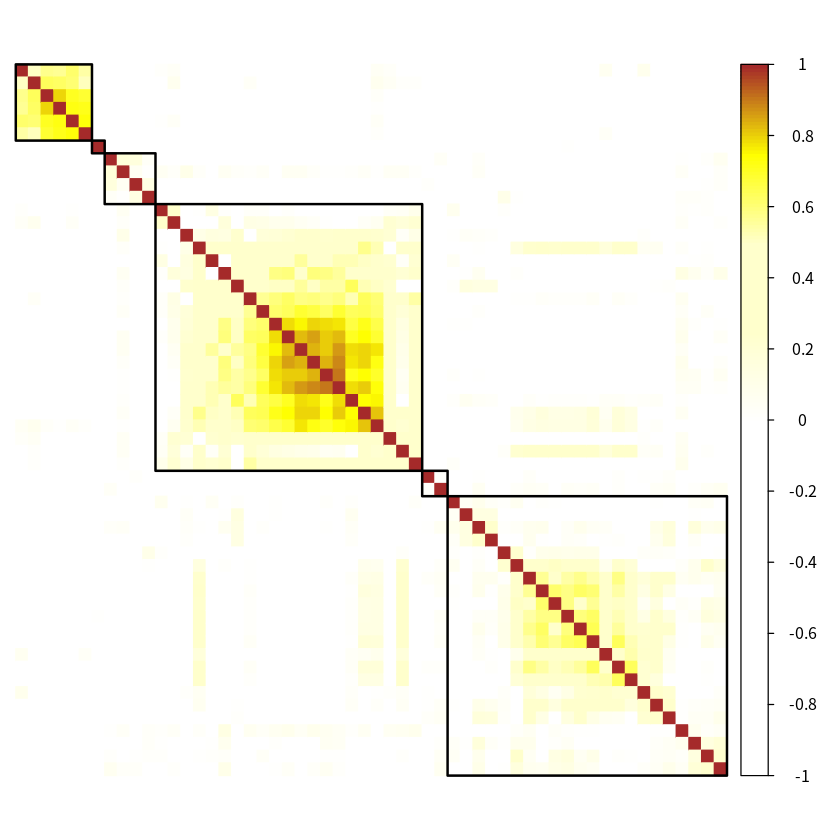

In [33]:
#用corrplot画图，便于标出各cluster的黑色方框
#pdf("scNMF.pdf")
corrplot(M, 
         method = "color", #用颜色展示相关系数，还可以改为"circle" (default), "square", "ellipse", "number", "pie", "shade"
         order = "hclust", 
         hclust.method = cor_method, 
         addrect = clusterK, #画黑色方框
         cl.lim=c(-1, 1),
         tl.pos = "n", #"n" means don't add textlabel
         col = colorRampPalette(c("white","white","white","white","white","#FFFFCC30","#FFFFCC99","yellow","brown"))(200)) # 运行?brewer.pal查看更多配色方案

In [37]:
cororder <- corrMatOrder(M, order = "hclust", hclust.method = cor_method)
M.hc <- M[cororder, cororder]
tree <- hclust(as.dist(1 - M.hc), method = cor_method)
clus <- cutree(tree, clusterK)
table(clus)

clus
 1  2  3  4  5  6 
 6  1  4 21  2 22 

In [38]:
library(rlist)

M_prog-> M_tmp2
#M_tmp-> M_tmp2
list_scores=list()


Attaching package: ‘rlist’


The following object is masked from ‘package:S4Vectors’:

    List




In [39]:
dim(M_tmp2)
head(M_tmp2)
# str(programG)

[1] 2022   56

,EBUS_10_1,EBUS_10_2,EBUS_10_3,EBUS_10_4,BRONCHO_11_1,BRONCHO_11_2,BRONCHO_11_3,BRONCHO_11_4,EBUS_12_1,EBUS_12_2,⋯,S5_3,S5_4,S6_1,S6_2,S6_3,S6_4,S7_1,S7_2,S7_3,S7_4
AGR3,5.574382,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ALDH1A1,6.307470,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ARHGAP18,4.052426,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ARL3,4.222625,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
BASP1,4.728308,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
C11orf88,4.990843,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [40]:
for(k in 1: clusterK)
{
 names(which(clus==k))->select_meta
  M_tmp2[, select_meta]->M_select
  as.matrix(M_select)-> M_select
  
  select_meta <- paste0("P", select_meta)
  
  colnames(M_select)<-select_meta
  unique(unlist(programG[select_meta]))-> select_genes
  new_matrix=matrix(0,length(select_genes),length(select_meta))
  colnames(new_matrix)<-select_meta
  rownames(new_matrix)<-select_genes
  for(kk in 1:length(select_meta))
  {
    new_matrix[programG[select_meta[kk]][[1]],select_meta[kk]]<-M_select[programG[select_meta[kk]][[1]],select_meta[kk]]
  }
  
  rowMeans(new_matrix)->average_scores
  list_scores[[k]]<-average_scores
}

In [41]:
str(list_scores)

List of 6
 $ : Named num [1:274] 3.15 12.71 6.81 9.61 6.34 ...
  ..- attr(*, "names")= chr [1:274] "ACYP1" "ARL6IP1" "ASF1B" "ASPM" ...
 $ : Named num [1:100] 15.46 12.07 9.09 15.55 9.06 ...
  ..- attr(*, "names")= chr [1:100] "ABCA13" "ACTN4" "ADD3" "AIF1" ...
 $ : Named num [1:292] 1.39 2.09 1.01 1.06 1.18 ...
  ..- attr(*, "names")= chr [1:292] "AGR3" "ALDH1A1" "ARHGAP18" "ARL3" ...
 $ : Named num [1:530] 2.19 0.795 0.682 1.645 2.653 ...
  ..- attr(*, "names")= chr [1:530] "ANAPC11" "APRT" "ARPC1A" "ARPC1B" ...
 $ : Named num [1:194] 3.35 5.31 4.09 5.98 4.23 ...
  ..- attr(*, "names")= chr [1:194] "ACOX1" "ACTN1" "ADK" "AKAP9" ...
 $ : Named num [1:1117] 0.279 0.459 1.489 0.439 2.511 ...
  ..- attr(*, "names")= chr [1:1117] "AGT" "ANAPC11" "ARPC1B" "ATP6V1F" ...


In [42]:
library(org.Hs.eg.db)
library(clusterProfiler)

In [73]:
k=6 # 1-signature1, 3-signature2, 4-signature3, 6-signature4

names(which(clus==k))
list_scores[[k]]->tmp_kk
 tmp_kk2<-tmp_kk[which(!grepl("^MT-",names(tmp_kk)))]
cand_gene<-names(sort(tmp_kk2,decreasing=T))[1:200]
go <- enrichGO(cand_gene ,OrgDb = org.Hs.eg.db, ont='BP',pAdjustMethod = 'fdr',pvalueCutoff = 0.05,       qvalueCutoff = 0.2 , keyType = 'SYMBOL')
write.csv(go,file = "table_out/3.2_NMF_signature4_GO_enrich_term.csv", quote = F)

[1] "EBUS_12_3"    "EBUS_13_3"    "S2_2"         "S7_2"         "EBUS_13_4"   
 [6] "EBUS_15_2"    "EBUS_10_4"    "EBUS_19_4"    "EBUS_51_4"    "EBUS_12_1"   
[11] "BRONCHO_11_4" "S7_3"         "S6_2"         "EBUS_13_2"    "S4_2"        
[16] "S2_3"         "EBUS_15_1"    "EBUS_51_1"    "S3_1"         "BRONCHO_11_3"
[21] "EBUS_19_3"    "S1_2"

In [74]:
# readRDS("data_out/3.2.tumorcell.rds")->tumorcell
# subset(tumorcell , orig.ident %in% patients )-> tumorcell
ScaleData(tumorcell,feature=cand_gene)-> tumorcell2
colMeans(tumorcell2$RNA@scale.data)->cand_value
tumorcell2[["cand__value"]]<-cand_value
tumorcell2@meta.data[,c("orig.ident","cand__value")]->select_data

Centering and scaling data matrix



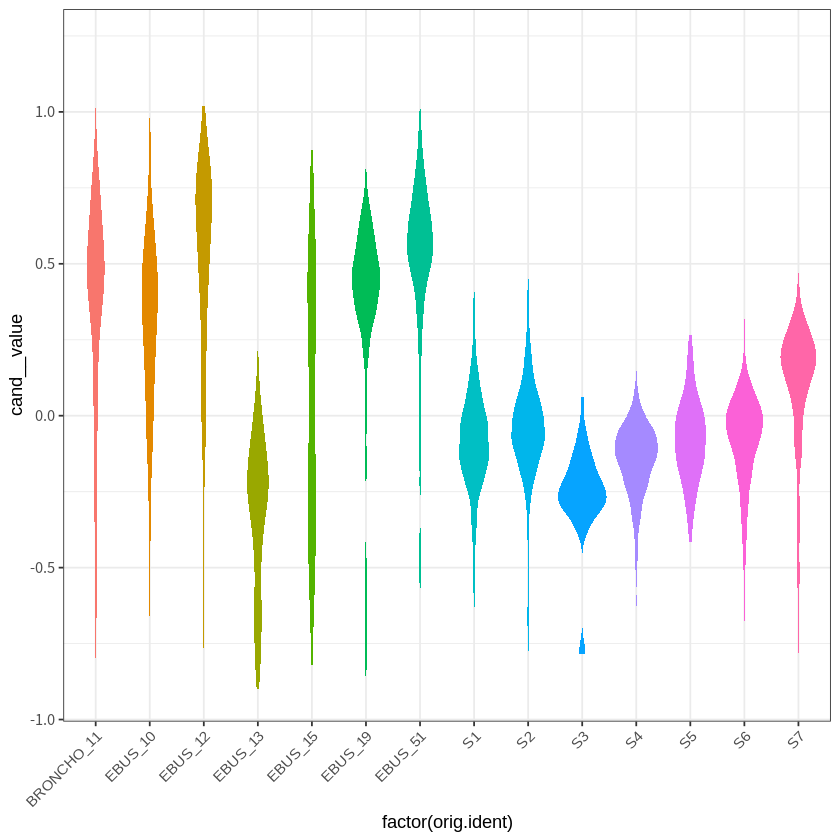

In [75]:
p <- ggplot(select_data, aes(x=factor(orig.ident), y= cand__value, fill=factor(orig.ident)))
p + geom_violin(colour=NA) +
theme_bw() +theme(axis.text.x = element_text(angle = 45, hjust = 1)) + NoLegend()


In [77]:
sessionInfo()

R version 4.1.2 (2021-11-01)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 16.04.7 LTS

Matrix products: default
BLAS/LAPACK: /home/inspur/miniconda3/envs/sclc_ldk/lib/libopenblasp-r0.3.18.so

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] rlist_0.4.6.2         AUCell_1.16.0         clusterProfiler_4.2.1
 [4] org.Hs.eg.db_3.14.0   AnnotationDbi_1.56.2  IRanges_2.28.0       
 [7] S4Vectors_0.32.3      corrplot_0.92         RColorBrewer_1.1-2   
[10] SeuratObject_4.0.4    Seurat_4.0.6          NMF_0.21.0           
[13]

character(0)